<a href="https://colab.research.google.com/github/manoj-0509/internship-tasks/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.**

We will handle this problem in a structured way. We will be following the table of content given below.

1)Problem Statement

2)Hypothesis Generation

3)Loading Packages and Data

4)Data Structure and Content

5)Exploratory Data Analysis

6)Univariate Analysis

7)Bivariate Analysis

8)Missing Value Treatment

9)Feature Engineering

10)Encoding Categorical Variables

11)Label Encoding

12)One Hot Encoding

13)PreProcessing Data

14)Modeling

15)Linear Regression

16)Regularized Linear Regression

17)RandomForest

18)XGBoost

19)Summary

**Project Description**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Hypothesis generation 

Item weight might effect a sales of the product.

Sales of the product may be depends on the items fat content.

More Item_Visibility of a particular product may be costlier than other products.

Item type could have an effect on the sales.

Are the items with more MRP have more item outlet sales.

Are the stores which have established earlier have more sales.

Size of the stores could have an effect on the item sales at a particular store.

Location of the stores might depends on the Item outlet sales.

Are the supermarkets have more sales than others.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler
from matplotlib import cm
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
import pickle
import warnings
warnings.filterwarnings('ignore')

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df=pd.read_csv("/content/drive/MyDrive/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
test=pd.read_csv("/content/drive/MyDrive/Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [44]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [46]:
test.fillna(test.mean(),inplace=True)
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [47]:
#filling the string values with mode
df=df.drop(['Item_Identifier'],axis=1)
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)

df.select_dtypes(include=('object')).isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [48]:
#filling the string values with mode
test=test.drop(['Item_Identifier'],axis=1)
test_cat_col = test.select_dtypes(include=('object')).columns
for c in test_cat_col:
    test[c].fillna(test[c].mode().values[0], inplace=True)

test.select_dtypes(include=('object')).isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [49]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [50]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0})  

In [51]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0})  

In [52]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object
le = LabelEncoder()
columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for i in columns :
  # Label encoding the "Outlet_Location_Type" column
  df[i] = le.fit_transform(df[i])
  # Verifying the encoded column
  print(df[[i]].head())

   Item_Fat_Content
0                 0
1                 1
2                 0
3                 1
4                 0
   Item_Type
0          4
1         14
2         10
3          6
4          9
   Outlet_Identifier
0                  9
1                  3
2                  9
3                  0
4                  1
   Outlet_Size
0            1
1            1
2            1
3            1
4            0
   Outlet_Location_Type
0                     0
1                     2
2                     0
3                     2
4                     2
   Outlet_Type
0            1
1            2
2            1
3            0
4            1


In [53]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object
le = LabelEncoder()
columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for i in columns :
  # Label encoding the "Outlet_Location_Type" column
  test[i] = le.fit_transform(test[i])
  # Verifying the encoded column
  print(test[[i]].head())

   Item_Fat_Content
0                 0
1                 1
2                 0
3                 0
4                 1
   Item_Type
0         13
1          4
2         11
3         13
4          4
   Outlet_Identifier
0                  9
1                  2
2                  0
3                  2
4                  5
   Outlet_Size
0            1
1            1
2            1
3            1
4            1
   Outlet_Location_Type
0                     0
1                     1
2                     2
3                     1
4                     2
   Outlet_Type
0            1
1            1
2            0
3            1
4            3


In [54]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [55]:
df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [56]:
df['Outlet_Identifier'].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [57]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [58]:
df['Outlet_Size'].value_counts()


1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [59]:
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [60]:
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [61]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

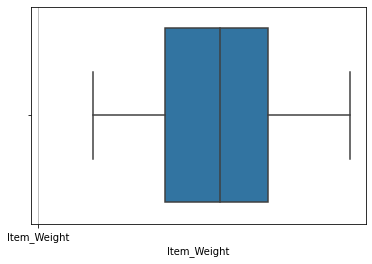

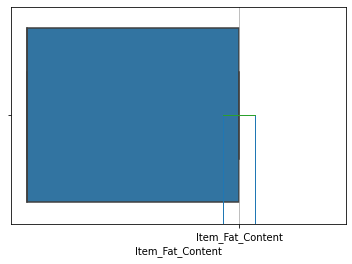

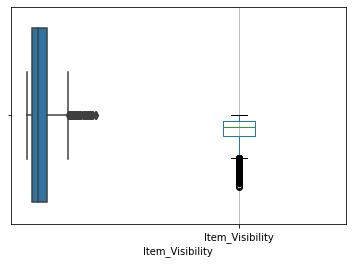

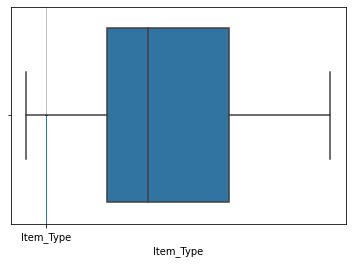

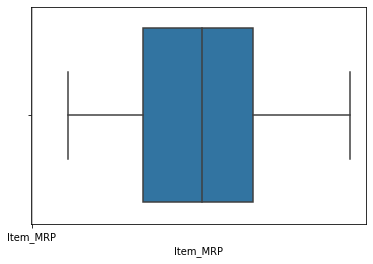

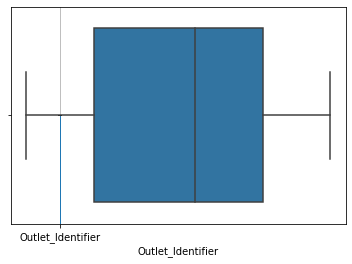

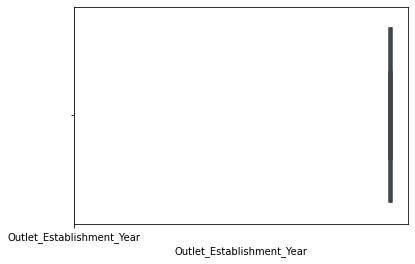

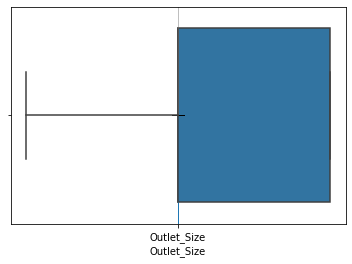

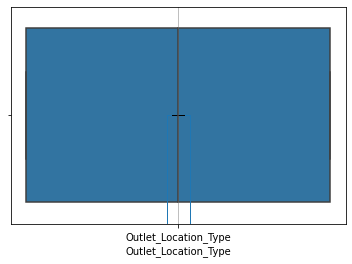

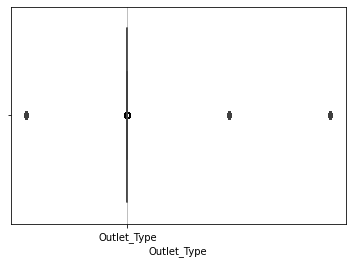

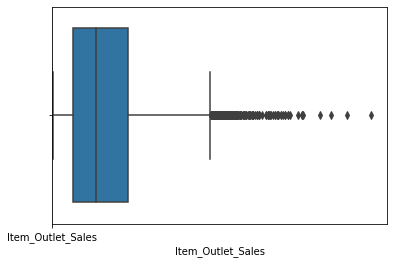

In [62]:
columns=df.columns
for i in columns:
  df.iloc[:,:].boxplot(column = i)
  sns.boxplot(df[i])
  plt.show()

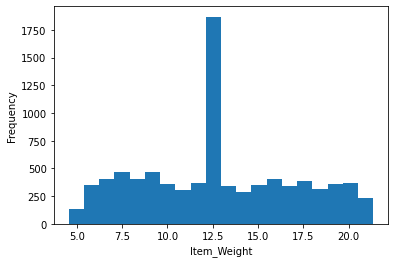

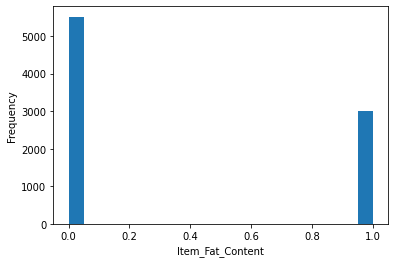

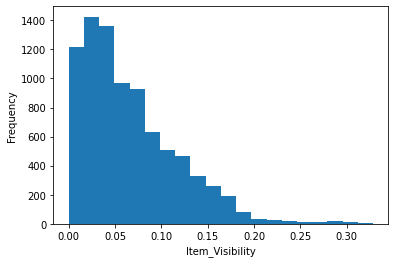

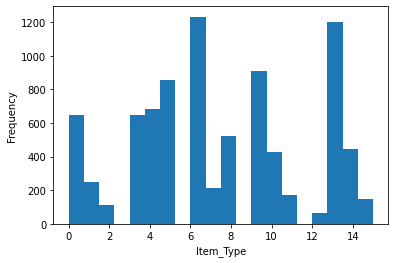

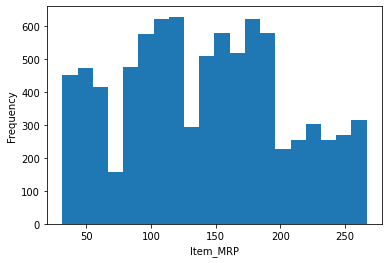

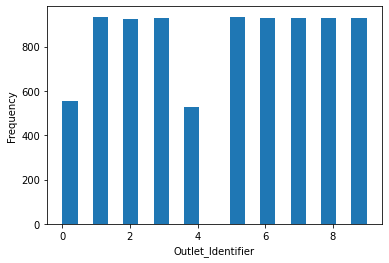

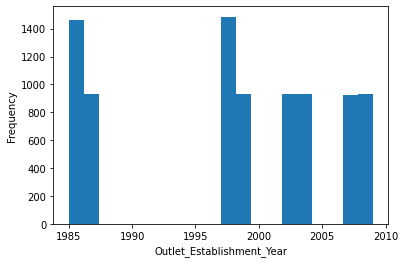

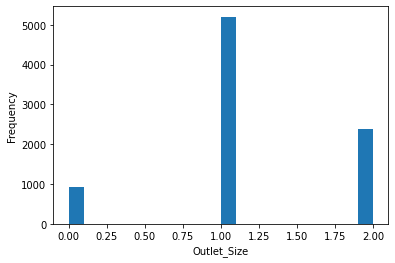

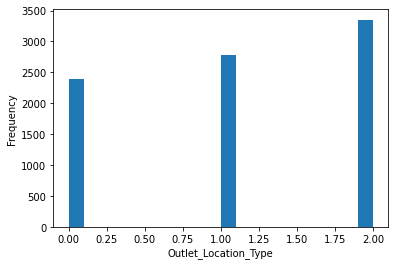

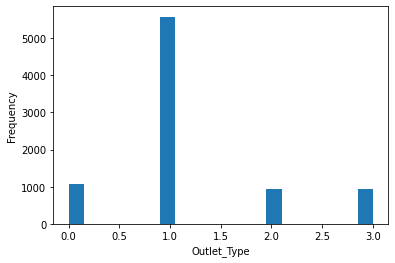

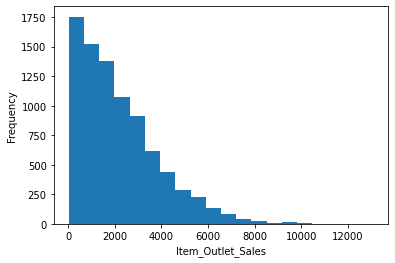

In [63]:
columns=df.columns
for i in columns:
  plt.hist(df[i], bins=20)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

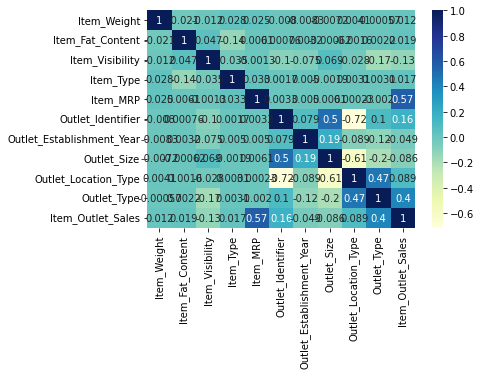

In [64]:
# Bivariate analysis
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [65]:
# Compute the Z-scores for each column in the dataset
z_scores = np.abs((df - df.mean()) / df.std())
# Remove the rows that contain outliers
df = df[(z_scores < 3).all(axis=1)]

In [66]:
x=pd.DataFrame(df.iloc[:,: -1].values)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,5.92,1.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0
2,17.50,0.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0
3,19.20,1.0,0.000000,6.0,182.0950,0.0,1998.0,1.0,2.0,0.0
4,8.93,0.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0


In [67]:
y=pd.DataFrame(df.iloc[:,-1].values)
y.head()

,0
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [68]:
#@title splitting into train and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/5,random_state=0)

In [69]:
#@title Linear Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x, y)
a=reg.predict(x_test)

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,a)

0.4873995694785266

In [71]:
#@title SVM Regressor
SVR=LinearSVR(C=1,loss="squared_epsilon_insensitive")
SVR.fit(x_train, y_train)
svr_pred=SVR.predict(x_test)
svr_pred

array([ 859.26396753, 3560.26753999, 1625.20904168, ..., 3708.06568446,
       3929.61815761,  477.7297189 ])

In [72]:
print('Accuracy ',r2_score(y_test,svr_pred)*100)

Accuracy  43.38394598735362


In [73]:
#@title Regularized Linear regression
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
rl=ridge.predict(x_test)

In [74]:
print('Accuracy ',r2_score(y_test,rl)*100)

Accuracy  48.73647356916937


In [75]:
#@title Random Forest Regressor
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print(RF_pred)

[1726.213002 4245.686756 1671.417662 ... 4874.328458 4092.226514
  305.082876]


In [76]:
print('Accuracy ',r2_score(y_test,RF_pred)*100)

Accuracy  55.452818079688925


In [77]:
#@title XGBoost
# Define the XGBoost model and set the hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,max_depth=5,alpha=10,n_estimators=100)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

In [78]:
print('Accuracy ',r2_score(y_test,y_pred)*100)

Accuracy  57.969586719067934
